In [20]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from statsmodels.formula.api import OLS
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import levene
from statsmodels.stats.diagnostic import het_breuschpagan
#We will also turn off warnings to make the code more readable
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('C:\\Users\\tilleymusprime\\Desktop\\mcclean1.csv')

In [3]:
#For this workbook, we will be looking at the strong safety position
ss = df[df['Position'] == 'SS']

In [4]:
#Now that we have the data all set up, we can remove the last non-numeric column:position
sscols = list(ss.columns.values)
print(sscols)

['Unnamed: 0', 'Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic', 'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping', 'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Position', 'Power Moves', 'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina', 'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short', 'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump', '3Cone', 'Shuttle', '40yd']


In [5]:
ss1 = ss[['Acceleration', 'Agility', 'Awareness', 'Ball Carrier Vision', 'Block Shedding', 'Carrying', 'Catch In Traffic',
          'Catching', 'Elusiveness', 'Finesse Moves', 'Hit Power', 'Impact Blocking', 'Injury', 'Juke Move', 'Jumping',
          'Man Coverage', 'Name', 'Overall Rating', 'Pass Block', 'Play Action', 'Play Recognition', 'Power Moves',
          'Press', 'Pursuit', 'Release', 'Route Running', 'Run Block', 'Spectacular Catch', 'Speed', 'Spin Move', 'Stamina',
          'Stiff Arm', 'Strength', 'Tackle', 'Team', 'Throw Accuracy Deep', 'Throw Accuracy Mid', 'Throw Accuracy Short',
          'Throw Power', 'Throw on the Run', 'Toughness', 'Trucking', 'Zone Coverage', 'Wt', 'Vertical', 'Bench', 'Broad Jump',
          '3Cone', 'Shuttle', '40yd']]

In [6]:
sscorr = ss1.corr()

In [7]:
sspos = sscorr[sscorr['Overall Rating'] >= 0.5]

In [8]:
ssneg = sscorr[sscorr['Overall Rating'] <= -0.5]

In [10]:
print(sspos['Overall Rating'], ssneg['Overall Rating'])
#These are the significant positive correlations. There are no significant negative correlations

Awareness           0.884694
Overall Rating      1.000000
Play Recognition    0.880221
Pursuit             0.574102
Tackle              0.506710
Zone Coverage       0.549935
Name: Overall Rating, dtype: float64 Series([], Name: Overall Rating, dtype: float64)


In [12]:
sssig = ss[['Awareness', 'Play Recognition', 'Pursuit', 'Tackle', 'Zone Coverage']]
X = add_constant(sssig)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#First we will remove Play Recognition

const               335.499405
Awareness             6.309324
Play Recognition      6.753930
Pursuit               1.703982
Tackle                1.443987
Zone Coverage         1.267367
dtype: float64

In [13]:
sssig1 = ss[['Awareness', 'Pursuit', 'Tackle', 'Zone Coverage']]
X = add_constant(sssig1)
pd.Series([variance_inflation_factor(X.values, i)
          for i in range(X.shape[1])],
         index=X.columns)
#Now that all of our vif scores are below 5, we can move on to the statistical summary testing

const            330.868767
Awareness          1.505489
Pursuit            1.611259
Tackle             1.442563
Zone Coverage      1.258202
dtype: float64

In [14]:
SS = sm.OLS(ss['Overall Rating'], sssig1).fit()

In [15]:
print(SS.summary())
#It looks like all of the variables are significantly different from 0
#It also looks like there might be a little bit of autocorrelation as noted by the Durbin-Watson statistic

                            OLS Regression Results                            
Dep. Variable:         Overall Rating   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.642e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):          2.16e-230
Time:                        19:07:11   Log-Likelihood:                -417.16
No. Observations:                 169   AIC:                             842.3
Df Residuals:                     165   BIC:                             854.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Awareness         0.4607      0.021     22.136

In [17]:
def model():
    pv = (0.4607*ss['Awareness'])+(0.1388*ss['Pursuit'])+(0.2140*ss['Tackle'])+(0.2163*ss['Zone Coverage'])
    return pv

In [22]:
ss['Predicted Value'] = model()
ss['Residual'] = ss['Predicted Value'] - ss['Overall Rating']

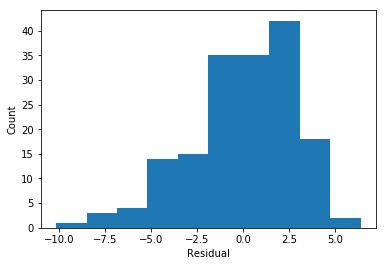

In [23]:
plt.hist(ss['Residual'])
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

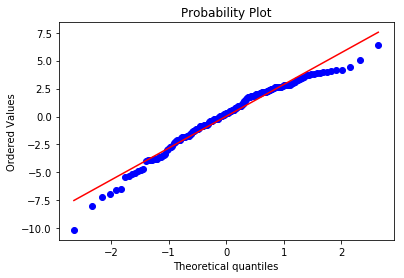

In [25]:
stats.probplot(ss['Residual'], plot=plt)
plt.show()
#It looks like there is an outlier in the data
#We will check and see if it is a high leverage point or not.  If it is, then we will remove it


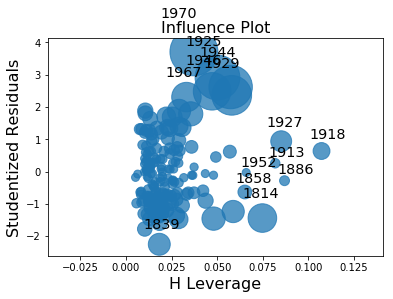

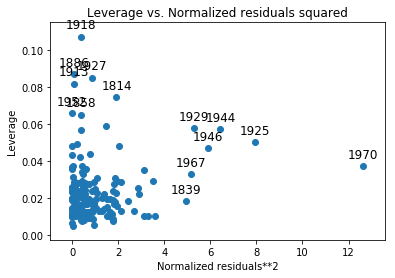

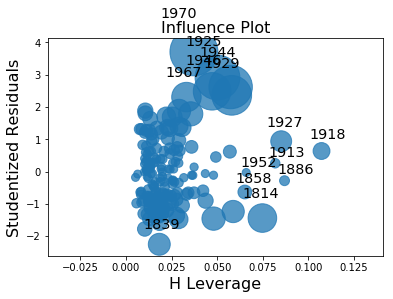

In [26]:
from statsmodels.graphics.regressionplots import *
plot_leverage_resid2(SS)
influence_plot(SS)
#There is a high residual point but it has a low leverage so we will keep it in the model

In [29]:
#Finally, we will check for homoskedasticity with the breusch-pagan test
het_breuschpagan(ss['Residual'], sssig1)
#Based on the low, pvalues, we reject the null hypothesis that there is heteroskedasticity

(54.30399157963534,
 9.664545219893562e-12,
 19.530231988982028,
 3.560919934505892e-13)

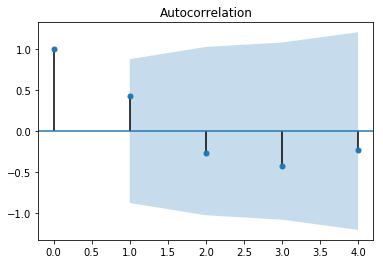

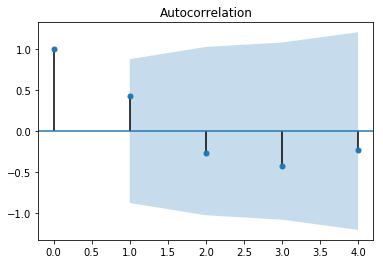

In [32]:
#Finally, we will test for autocorrelation in the model
sscorr1 = ss[['Overall Rating','Awareness', 'Pursuit', 'Tackle', 'Zone Coverage']].corr()
plot_acf(sscorr1['Overall Rating'])
#There does not appear to be any autocorrelation in the model

In [33]:
X_train, X_test, y_train, y_test = train_test_split(sssig1, ss['Overall Rating'], test_size = 0.3, random_state =42)

In [34]:
reg= LinearRegression()

In [35]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [36]:
y_pred  =reg.predict(X_test)

In [37]:
sscv = cross_val_score(reg, sssig1, ss['Overall Rating'], cv = 5)

In [38]:
sscv_mean = np.mean(sscv)

In [39]:
print(sscv, sscv_mean)
#It looks like the model explains 81.3% of the variance in the data

[0.86488527 0.93676077 0.87419225 0.79887308 0.5841715 ] 0.8117765728398616


In [41]:
#Finally, we will check for homoskedasticity with the breusch-pagan test
het_breuschpagan(ss['Residuals'], sssig1)
#Based on the low, pvalues, we reject the null hypothesis that there is heteroskedasticity

(67.02733909298975,
 9.620317032771504e-14,
 21.106542248915623,
 2.1897818736708432e-16)

In [40]:
ssclean1 =  ss[['Overall Rating','Awareness', 'Pursuit', 'Tackle', 'Zone Coverage']]
ssdesc = ssclean1.describe()

In [42]:
ssdesc.to_csv('C:\\Users\\tilleymusprime\\Desktop\\sssig1.csv')